In [1]:
%ls

EU_drought_maps_2003_2018_8d.nc  images/   README.md
extra_utils/                     masks.nc  visualization.ipynb


In [2]:
import numpy as np
import xarray as xr

from extra_utils.nc_tools import xr2np
from extra_utils.drought_vis import plot_drought_map
from extra_utils.drought_vis import plot_drought_signal_curve
from extra_utils.drought_vis import generate_drought_animation

In [3]:
drought_maps = xr.load_dataset("./EU_drought_maps_2003_2018_8d.nc")
gt = xr.load_dataset("./masks.nc")

# "2012-01-01", "2013-12-31"
# "2012-06-05", "2012-08-24"
drought_maps = drought_maps.sel(time=slice("2012-01-01", "2013-12-31")) # 

gt = gt.sel(time=slice("2012-01-01", "2013-12-31"))

# "Russian" 59., 43., 30., 64
local_maps = drought_maps.sel(lat=slice(59., 43.), lon=slice(30., 64.))
local_gt = gt.sel(lat=slice(59., 43.), lon=slice(30., 64.))
local_str = "Russian"

dates = np.array(gt['time'].dt.strftime("%Y%m%d")).astype(str)

print(drought_maps)
print(gt)

<xarray.Dataset>
Dimensions:         (lat: 672, lon: 1176, time: 92)
Coordinates:
  * lat             (lat) float64 81.46 81.38 81.29 81.21 ... 25.71 25.63 25.54
  * lon             (lon) float64 -27.96 -27.88 -27.79 ... 69.79 69.87 69.96
  * time            (time) datetime64[ns] 2012-01-05 2012-01-13 ... 2013-12-31
Data variables:
    drought_prob_0  (time, lat, lon) float32 0.0016096185 ... 0.6525794
    drought_prob_1  (time, lat, lon) float32 0.00045798623 ... 0.058530077
<xarray.Dataset>
Dimensions:     (lat: 672, lon: 1176, time: 92)
Coordinates:
  * lat         (lat) float64 81.46 81.38 81.29 81.21 ... 25.71 25.63 25.54
  * lon         (lon) float64 -27.96 -27.88 -27.79 -27.71 ... 69.79 69.87 69.96
  * time        (time) datetime64[ns] 2012-01-05 2012-01-13 ... 2013-12-31
Data variables:
    mask_EMDAT  (lat, lon, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


In [4]:
print(dates[20])

20120613


In [5]:
drought_maps = xr2np(drought_maps)
gt = np.transpose(xr2np(gt),axes=(2, 0, 1))
local_maps = xr2np(local_maps)
local_gt = np.transpose(xr2np(local_gt),axes=(2, 0, 1))
print(drought_maps.shape)
print(gt.shape)

(2, 92, 672, 1176)
(92, 672, 1176)


/root/mambaforge/envs/drought_monitor/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


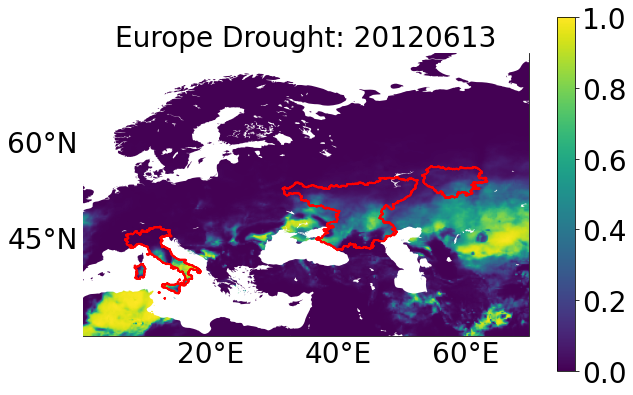

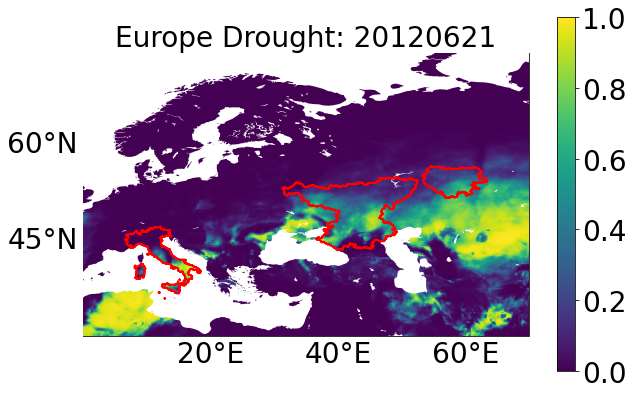

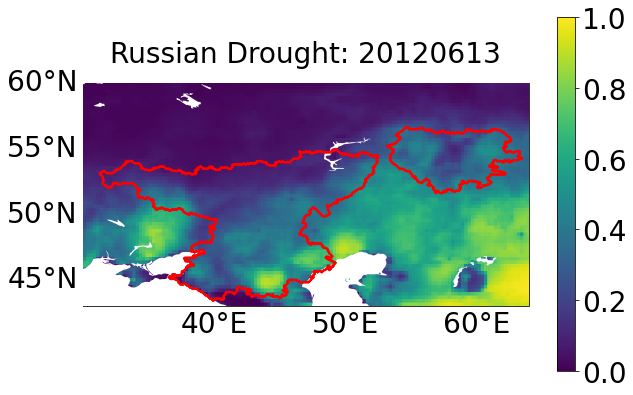

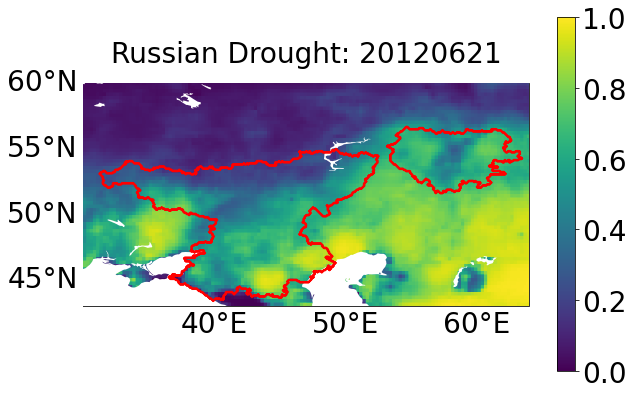

In [6]:
plot_drought_map(drought_maps[0, 20:22], gt[20:22], place_str="Europe", date_list=dates[20:22])
plot_drought_map(local_maps[0, 20:22], local_gt[20:22], place_str=local_str, date_list=dates[20:22])

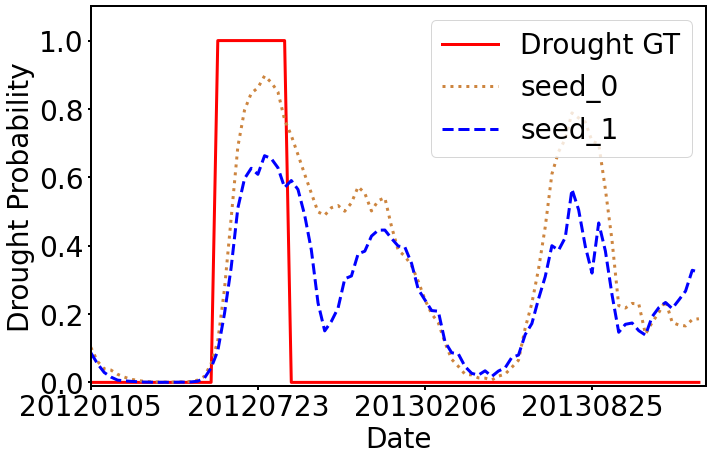

In [7]:
plot_drought_signal_curve([local_maps[0], local_maps[1]], local_gt, ["seed_0", "seed_1"], dates)

In [8]:
%ls ./images/

seed_0_maps/


In [9]:
%rm -rf ./images/*

In [10]:
image_path = plot_drought_map(drought_maps[0], gt, place_str="Europe", date_list=dates, 
                              method_str="seed_0", save_path="./images/")
gif_path = generate_drought_animation(search_path=image_path, start_date="20120101", end_date="20131231")

/root/mambaforge/envs/drought_monitor/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


<Figure size 432x288 with 0 Axes>

In [11]:
%ls ./images/seed_0_maps/ 

20120101_20131231_maps.gif  20120707.png  20130113.png  20130724.png
20120105.png                20120715.png  20130121.png  20130801.png
20120113.png                20120723.png  20130129.png  20130809.png
20120121.png                20120731.png  20130206.png  20130817.png
20120129.png                20120808.png  20130214.png  20130825.png
20120206.png                20120816.png  20130222.png  20130902.png
20120214.png                20120824.png  20130302.png  20130910.png
20120222.png                20120901.png  20130310.png  20130918.png
20120301.png                20120909.png  20130318.png  20130926.png
20120309.png                20120917.png  20130326.png  20131004.png
20120317.png                20120925.png  20130403.png  20131012.png
20120325.png                20121003.png  20130411.png  20131020.png
20120402.png                20121011.png  20130419.png  20131028.png
20120410.png                20121019.png  20130427.png  20131105.png
20120418.png                201210

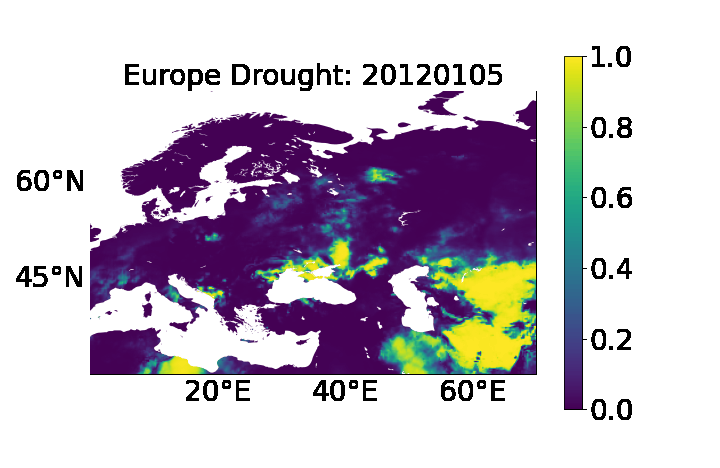

In [12]:
from IPython.display import Image
Image(gif_path)
# ![SegmentLocal](./images/seed_0_maps/20120101_20131231_maps.gif "segment")